In [1]:
import nltk
import numpy as np
import math
import matplotlib.pylab as plt
from matplotlib import gridspec
import pandas as pd
import scipy.stats as st
import seaborn as sns


In [2]:
lang = ["de_en" , "en_kk" , "en_ru" , "ru_de" , "ru_kk"]

In [3]:
with open('mt/de_en_1.txt') as f:
    a = f.read() 
with open('mt/de_en_gold.txt') as f:
    b = f.read() 

In [4]:
def prep(path):
    with open("mt/"+path+"_1.txt","r", encoding="utf-8") as f:
        a_1 = f.read() 
    with open("mt/"+path+"_2.txt" , "r", encoding="utf-8") as f:
        a_2 = f.read()
    with open("mt/"+path+"_gold.txt" , "r", encoding="utf-8") as f:
        a_g = f.read()
    c_1 = a_1.split("\n")
    c_2 = a_2.split("\n")
    c_g = a_g.split("\n")
    return ([b.lower().split() for b in c_1] ,[b.lower().split() for b in c_2] , [b.lower().split() for b in c_g]) 

In [5]:
de_en = prep('de_en')

In [6]:
for i in lang:
    c = prep(i)
    print(len(c[0]) , len(c[1]) , len(c[2]))

102 102 101
63 62 62
96 95 95
52 51 51
92 91 91


для начала нужно приготовить выборки для этого посчитаем BLUE для каждого предложения между нашим переводчиком и GOLD



In [7]:
def get_lists(lang):
    list_of_mark =[]
    for i in lang:
        c = prep(i)
        if i == "de_en":
            del c[0][-1]
            del c[1][-1]
        else:
            del c[0][-1]
        del c[0][-1]
        del c[1][-1]
        del c[2][-1]
        mark_1 = []
        mark_2 = []
        for k , j in enumerate(c[2]):
            mark_1.append(nltk.translate.bleu_score.sentence_bleu(c[0][k] , j))
            mark_2.append(nltk.translate.bleu_score.sentence_bleu(c[2][k] , j))
        list_of_mark.append([mark_1 , mark_2])
    return list_of_mark

In [8]:
list_of_mark = get_lists(lang)

C:\ProgramData\Anaconda3\lib\site-packages\nltk\translate\bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\ProgramData\Anaconda3\lib\site-packages\nltk\translate\bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\ProgramData\Anaconda3\lib\site-packages\nltk\translate\bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

In [9]:
len(list_of_mark[1])

2

нужно сравнить две выборки

гипотеза: для каждого перевода(пары языков) среднее значение метрики BLUE выше для одного из переводчиков (это будет значить что этот переводчик лучше)

In [10]:
for lang_par in list_of_mark:
    #for k in range(2):
    print(sum(lang_par[0]) , sum(lang_par[1]))
    

1.4166189181615513e-78 1.1688237472947109e-229
4.723586984566383e-230 6.22170963020232e-230
1.5140529649849556e-78 1.2288026500291992e-229
2.0882843913962241e-78 5.307175679625388e-230
7.27971062511068e-230 1.1139601591497505e-229


у нас есть выборки нужно проверить насколько хорошо они описываются нормальным распределением

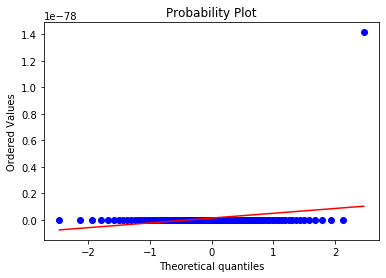

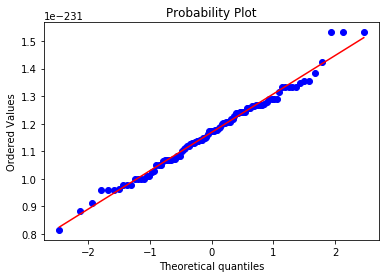

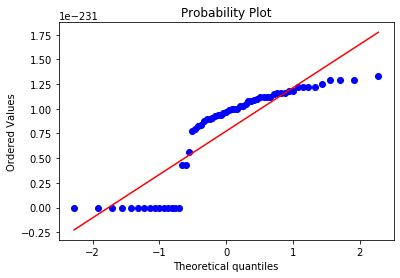

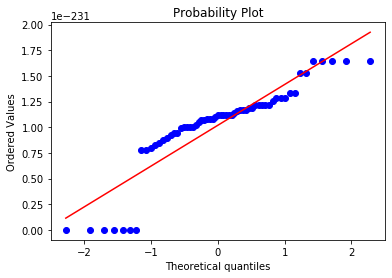

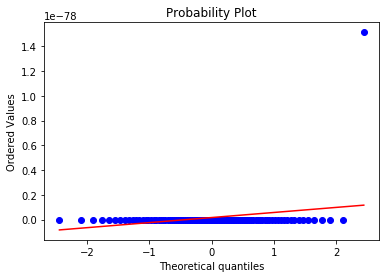

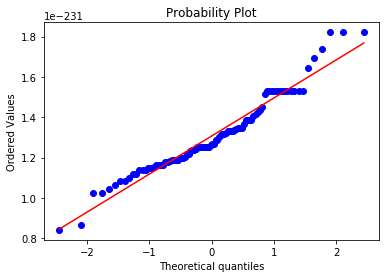

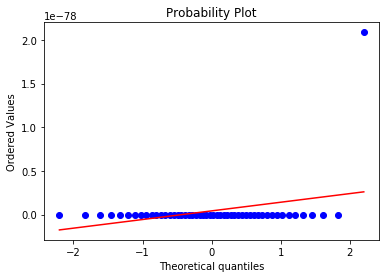

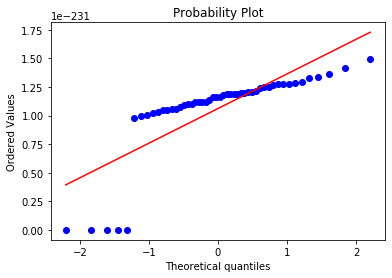

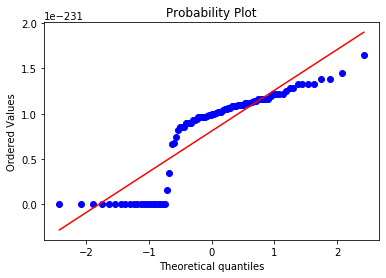

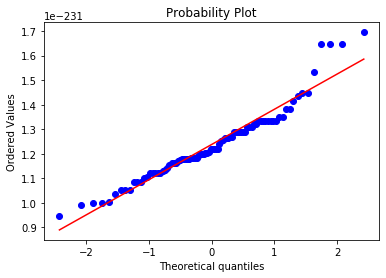

In [11]:
for j in list_of_mark:
    qq_points, qq_line = st.probplot(j[0], plot=plt)
    plt.show()
    qq_points, qq_line = st.probplot(j[1], plot=plt)
    plt.show()

давайте еще сделает shapiro)

In [12]:
for j in list_of_mark:
    print(st.shapiro(j[0]) , st.shapiro(j[1])) 

(1.0, 1.0) (1.0, 1.0)
(1.0, 1.0) (1.0, 1.0)
(1.0, 1.0) (1.0, 1.0)
(1.0, 1.0) (1.0, 1.0)
(1.0, 1.0) (1.0, 1.0)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [13]:
for j in list_of_mark:
    for k in range(len(j[0])):
        j[0][k] *= 1e78
        j[1][k] *= 1e78

In [14]:
1e5

100000.0

In [15]:
for j in list_of_mark:
    print(st.shapiro(j[0]) , st.shapiro(j[1]))

(0.07519251108169556, 3.3711737281791994e-22) (1.0, 1.0)
(1.0, 1.0) (1.0, 1.0)
(0.07878684997558594, 1.5051934591885734e-21) (1.0, 1.0)
(0.12542837858200073, 1.1273950294439614e-15) (1.0, 1.0)
(1.0, 1.0) (1.0, 1.0)


в общем понятно что выборки не нормальные проблема была в том что числа там были очень маленькие 

значит нужно использовать непараметрические критерии

построим список разностей 



In [16]:
sub_list = []
for j in list_of_mark:
    subs = []
    for k in range(len(j[0])):
        subs.append(j[0][k] - j[1][k] )
    sub_list.append(subs)

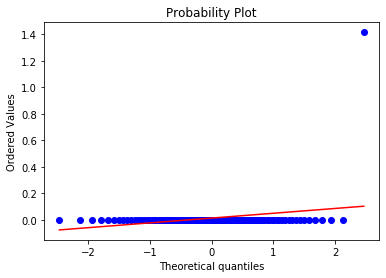

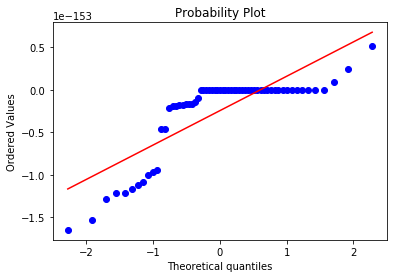

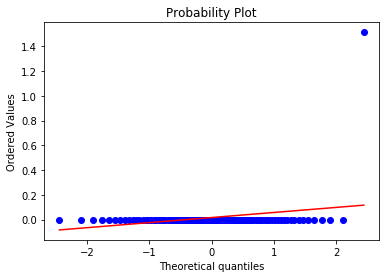

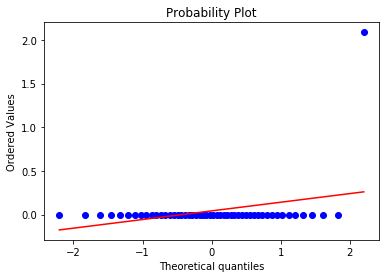

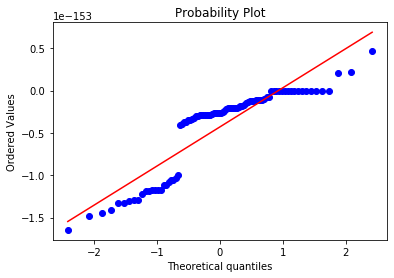

In [17]:
for j in sub_list:
    qq_points, qq_line = st.probplot(j, plot=plt)
    plt.show()
    

In [18]:
# бутстрап
from arch.bootstrap import IIDBootstrap

# критерий знаков
from statsmodels.stats.descriptivestats import sign_test

# перестановочный критерий
from permute.core import one_sample

In [19]:
sub_list = np.array(sub_list)

In [20]:
for j in sub_list:
    print(np.mean(j)) 

0.014166189181615513
-2.455938763337603e-154
0.016106946436010166
0.04176568782792448
-4.288767740429807e-154


отнормируем числа чтобы не было проблем с маленькими числами 

In [21]:
for j in range(len(sub_list)):
    sub_list[j] /= abs(np.mean(sub_list[j])) 

In [22]:
for j in sub_list:
    print(np.mean(j)) 

1.0
-1.0
1.0
1.0
-0.9999999999999999


In [23]:
for j in sub_list:
    print(st.wilcoxon(j))

WilcoxonResult(statistic=796.5, pvalue=0.0009037673585749162)
WilcoxonResult(statistic=28.0, pvalue=0.00017931632667681752)
WilcoxonResult(statistic=561.5, pvalue=0.0005099912549493772)
WilcoxonResult(statistic=21.0, pvalue=0.0017130176382195042)
WilcoxonResult(statistic=99.0, pvalue=3.8732557983994984e-12)


итак видим что для всех пар языков значение p-value получается очень маленьким, значит мы отвергаем гипотезу о том что средние для этих выборок совпадают

In [24]:
for j in sub_list:
    bs = IIDBootstrap(np.array(j))
    print(bs.conf_int(np.mean, 10000, method='bca'))


[[1.57816115e-76]
 [3.00000000e+00]]
[[-1.5699554 ]
 [-0.57992625]]
[[9.31801165e-77]
 [3.00000000e+00]]
[[-2.00889851e-153]
 [ 3.00000000e+000]]
[[-1.25752743]
 [-0.77755844]]


видим что 0 попадает в доверительный интервал для среднего только для 4-го перевода (и то совсем немого если мы немого изменим уровень значимости то 0 уже попадать не будет, а значит гипотезу о равенстве средних можно отклонить)

то есть по каждому конкретному перреводу в среднем можно сказать что какой-то переводчик превосходит другой


если разность больше нуля то лучше первый (если BLUE больше то этот перевод лучше ) перевод




# про два переводчика

так выборки не нормальные  предлагается использовать binom_test

но так как разные языки имеют совершенно разную структуру то нельзя гарантировать что на одной паре метрика не будет в 10 больше чем в другой, а значит нельзя и смешивать значения BLUE для разных языков 

то есть мы выдвигаем гипотезу что один переводчик превосходит другой на конкретной языковой паре случайным образом (монетка p_0 = 0.5)

In [34]:
a = [1,0,1,1,0]

In [35]:
st.binom_test(sum(a), len(a) )

1.0

мы видим что данные гипотезе не противоречат, а значит мы не можем сказать что один переводчик лучше другого